In [1]:
import pandas as pd
import pandas as pd
rtt_trace_orig = pd.read_csv('Data/Autobahn/RTT_Loss_Bridges.csv')
rtt_trace = rtt_trace_orig.copy()
rtt_trace = rtt_trace[rtt_trace["nearest_bridge_line_distance"] <= 25]
rtt_trace.loc[rtt_trace['lost'] == True, 'time'] = -1
rtt_trace["timestamp"] = pd.to_datetime(rtt_trace["timestamp"])
rtt_trace.dropna(subset=["time"], inplace=True)
rtt_trace.loc[(rtt_trace['nearest_bridge_id'] == 20) & (rtt_trace.index <= 253215), 'nearest_bridge_id'] = None
rtt_trace.loc[(rtt_trace['nearest_bridge_id'] == 98) & (rtt_trace.index <= 13084), 'nearest_bridge_id'] = None
rtt_trace = rtt_trace.dropna(subset=['nearest_bridge_id'])
rtt_trace['nearest_bridge_id'] = rtt_trace['nearest_bridge_id'].astype(int)
rtt_trace = rtt_trace[rtt_trace['time'] <= 1000]
rtt_trace

,timestamp,destination_IP,icmp_seq,ttl,time,lost,Time(sec),Latitude,Longitude,Horizontal Accuracy(m),...,Speed(m/s),Average Speed(m/s),Course(deg),True Heading(deg),Magnetic Heading(deg),Heading Accuracy(deg),Speed(km/h),nearest_bridge_distance,nearest_bridge_id,nearest_bridge_line_distance
16025,2024-04-19 18:51:28.955883008,100.64.0.1,17847,64,28.3,False,199.460595,53.179046,7.293383,4.739214,...,18.027292,17.858423,205.514343,131.505081,128.342377,18.275023,64.898250,27.517382,98,24.973308
16026,2024-04-19 18:51:28.963913984,100.64.0.1,17848,64,24.0,False,199.468599,53.179045,7.293382,4.739215,...,18.028368,17.877150,205.514343,131.505081,128.342377,18.275023,64.902123,27.392557,98,24.830253
16027,2024-04-19 18:51:28.980323584,100.64.0.1,17849,64,-1.0,True,199.484608,53.179043,7.293380,4.739217,...,18.030519,17.914603,205.514343,131.505081,128.342377,18.275023,64.909869,27.143461,98,24.544144
16028,2024-04-19 18:51:28.996733440,100.64.0.1,17850,64,-1.0,True,199.501616,53.179040,7.293378,4.739220,...,18.032805,17.954397,205.514343,131.505081,128.342377,18.275023,64.918099,26.879626,98,24.240152
16029,2024-04-19 18:51:29.013143040,100.64.0.1,17851,64,-1.0,True,199.517628,53.179038,7.293377,4.739184,...,18.044294,17.961419,205.514343,131.505081,128.342377,18.275023,64.959459,26.619465,98,23.940917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389400,2024-04-19 20:10:02.830723072,100.64.0.1,63542,64,25.6,False,4913.392600,52.269001,7.980923,4.797418,...,23.976111,23.750882,87.327492,91.173073,88.010033,10.000000,86.314000,25.544944,0,23.727595
389401,2024-04-19 20:10:02.844016128,100.64.0.1,63543,64,28.9,False,4913.405599,52.269001,7.980928,4.797345,...,23.979504,23.755272,87.327492,91.173073,88.010033,10.000000,86.326215,25.849201,0,24.036648
389402,2024-04-19 20:10:02.857671936,100.64.0.1,63544,64,31.4,False,4913.419599,52.269001,7.980933,4.797266,...,23.983158,23.760000,87.327492,91.173073,88.010033,10.000000,86.339370,26.177078,0,24.369474
389403,2024-04-19 20:10:02.870685952,100.64.0.1,63545,64,29.7,False,4913.432598,52.269001,7.980937,4.797192,...,23.986551,23.764390,87.327492,91.173073,88.010033,10.000000,86.351585,26.481729,0,24.678527


Bridges with more lost samples before the bridge: 90
Bridges with more lost samples after the bridge: 3


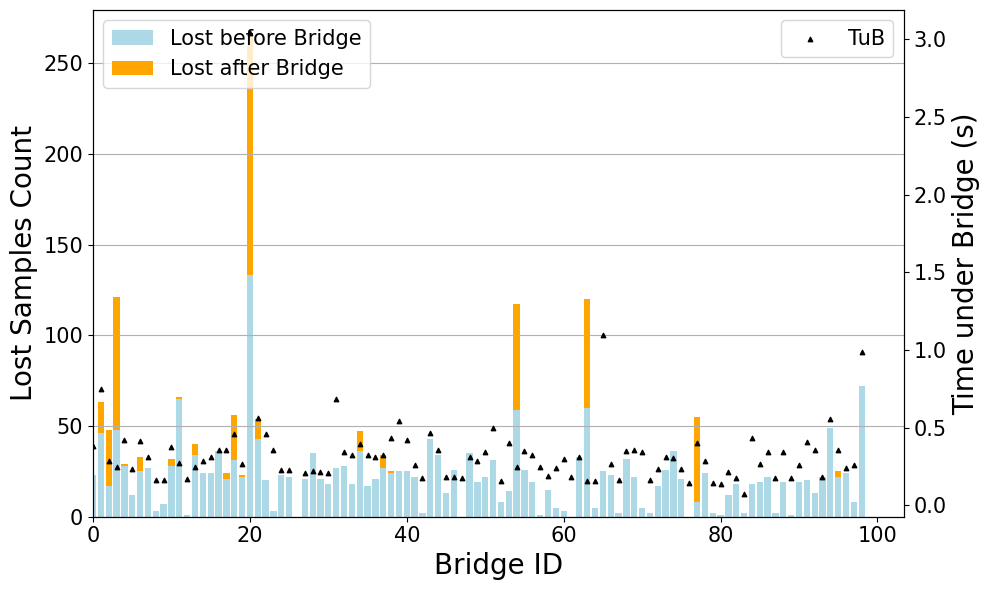

In [2]:
"""Fig. 12"""
import pandas as pd
import matplotlib.pyplot as plt

bridge_data = pd.read_csv("Data/Autobahn/Bridges.csv", sep=";")
bridge_data['Breite'] = bridge_data['Breite'].str.replace(',', '.').astype(float)
bridge_data['Laenge'] = bridge_data['Laenge'].str.replace(',', '.').astype(float)

# Sample DataFrame setup (assuming rtt_trace is already defined, as previously mentioned)
# grouped = rtt_trace.sort_values('timestamp')
grouped = rtt_trace.sort_values('timestamp').reset_index(drop=True)

# Step 2: Define a function to get peak data and count lost samples
def get_peak_data(df, bid):    
    df = df[df['nearest_bridge_id']==bid]
    b_width = bridge_data.iloc[bid]["Breite"]
    velocity = df["Speed(m/s)"].median()
    tub = b_width / velocity
    peak_time = df['time'].max()
    peak_timestamp = df.loc[df['time'] == peak_time, 'timestamp'].iloc[0]

    
    min_distance_index = df['nearest_bridge_line_distance'].idxmin()
    
    # Split the distances into "before" and "after" the minimum distance index
    df['Adjusted Distance to Bridge'] = df['nearest_bridge_line_distance']
    df.loc[:min_distance_index, 'Adjusted Distance to Bridge'] *= -1
    

    # Count lost samples before the peak
    lost_before_peak = df[(df['Adjusted Distance to Bridge'] < 0) & (df['lost'] == True)].shape[0]
    avg_speed_before_peak = df[(df['Adjusted Distance to Bridge'] < 0) & (df['lost'] == True)]['Speed(km/h)'].mean()

    # Count lost samples after the peak
    lost_after_peak = df[(df['Adjusted Distance to Bridge'] > 0) & (df['lost'] == True)].shape[0]

    # Return the counts
    return lost_before_peak, lost_after_peak, avg_speed_before_peak, peak_time, tub

# Step 3: Apply the function to each group and store the counts
lost_counts = []

for group in grouped.groupby('nearest_bridge_id'):    
    if len(group[1]['nearest_bridge_id'].unique()) == 1:
       bridge_id = group[1]['nearest_bridge_id'].unique()[0]
    lost_before, lost_after, avg_speed_bef, maxrtt, tub  = get_peak_data(group[1], bridge_id)
    lost_counts.append({'nearest_bridge_id': bridge_id, 'Lost Before Peak': lost_before, 'Lost After Peak': lost_after, 'Speed Before': avg_speed_bef, 'MaxRTT': maxrtt, 'tub': tub})



# Create a DataFrame for the lost counts
lost_counts_df = pd.DataFrame(lost_counts)

more_before_peak = lost_counts_df[lost_counts_df['Lost Before Peak'] > lost_counts_df['Lost After Peak']].shape[0]
more_after_peak = lost_counts_df[lost_counts_df['Lost Before Peak'] < lost_counts_df['Lost After Peak']].shape[0]

print(f'Bridges with more lost samples before the bridge: {more_before_peak}')
print(f'Bridges with more lost samples after the bridge: {more_after_peak}')

# Step 4: Plotting a stacked bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))  # Use fig and ax1 for the first y-axis
color = 'tab:blue'
ax1.bar(lost_counts_df['nearest_bridge_id'], lost_counts_df['Lost Before Peak'], 
        label='Lost before Bridge', color='lightblue')
ax1.bar(lost_counts_df['nearest_bridge_id'], lost_counts_df['Lost After Peak'], 
        label='Lost after Bridge', color='orange', 
        bottom=lost_counts_df['Lost Before Peak'])  # Bottom parameter stacks bars

# Customize the first y-axis
ax1.set_xlabel('Bridge ID', size=20)
ax1.set_ylabel('Lost Samples Count', size=20)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.grid(axis='y')


# Add a third y-axis for 'tob'
ax2 = ax1.twinx()  # Create a third axes
ax2.spines['right']  # Offset the third y-axis
ax2.scatter(lost_counts_df['nearest_bridge_id'], lost_counts_df['tub'], 
            color='black', label='TuB', s=10, marker='^')  # Scatter plot for 'tob'
ax2.set_ylabel('Time under Bridge (s)', size=20, color='black')  # Y-axis label for 'tob'
ax2.tick_params(axis='y', labelsize=15, colors='black')  # Tick parameters for the third y-axis

# Add legends
ax1.legend(loc='upper left', fontsize=15)
ax2.legend(loc='upper right', fontsize=15)

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.savefig('Plots/Fig12.pdf')
plt.show()

In [3]:
import pandas as pd
import pandas as pd
rtt_trace_orig = pd.read_csv('Data/Autobahn/RTT_Loss_Bridges.csv')
rtt_trace = rtt_trace_orig.copy()
rtt_trace.loc[rtt_trace['nearest_bridge_line_distance'] > 25, 'nearest_bridge_id'] = None
rtt_trace.loc[rtt_trace['lost'] == True, 'time'] = -1
rtt_trace["timestamp"] = pd.to_datetime(rtt_trace["timestamp"])
rtt_trace.loc[(rtt_trace['nearest_bridge_id'] == 20) & (rtt_trace.index <= 253215), 'nearest_bridge_id'] = None
rtt_trace['time'] = rtt_trace['time'].fillna(-1)
rtt_trace = rtt_trace[rtt_trace['time'] <= 1000]

# only use the samples collected on the autobahn
startdate = pd.to_datetime("2024-04-19 18:51:00")
enddate = pd.to_datetime("2024-04-19 20:11:00")
rtt_trace = rtt_trace[(rtt_trace["timestamp"] >= startdate) & (rtt_trace["timestamp"] <= enddate)]

# remove gas station loss
#rtt_trace = rtt_trace.drop(index=range(414751, 426194))

# Group where Bridge ID is None
group_none = rtt_trace[rtt_trace['nearest_bridge_id'].isnull()]

# Group where Bridge ID is not None
group_not_none = rtt_trace[rtt_trace['nearest_bridge_id'].notnull()]

# Calculate total samples and lost samples for each group
total_none = len(group_none)
lost_none = group_none['lost'].sum()  # Assuming lost is a boolean, sum gives count of True

total_not_none = len(group_not_none)
lost_not_none = group_not_none['lost'].sum()  # Assuming lost is a boolean, sum gives count of True

# Calculate relative number of lost samples
relative_lost_none = lost_none / total_none if total_none > 0 else 0
relative_lost_not_none = lost_not_none / total_not_none if total_not_none > 0 else 0

# Display results
print("\nRelative number of lost samples:")
print(f"Where Bridge ID is None: {relative_lost_none:.2f}")
print(f"Where Bridge ID is not None: {relative_lost_not_none:.2f}")


Relative number of lost samples:
Where Bridge ID is None: 0.02
Where Bridge ID is not None: 0.19


In [4]:
# Bridge dfs erzeugen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

throughput_data = pd.read_csv("Data/Autobahn/Throughput_Bridges.csv")
throughput_data = throughput_data[throughput_data["nearest_bridge_line_distance"] <= 200]
bridge_data = pd.read_csv("Data/Autobahn/Bridges.csv", sep=";")
bridge_data['Breite'] = bridge_data['Breite'].str.replace(',', '.').astype(float)
bridge_data['Laenge'] = bridge_data['Laenge'].str.replace(',', '.').astype(float)

# use all bridges where width is 6m 
bridges_6m = bridge_data[bridge_data['Breite']==6]
bridges_9m = bridge_data[bridge_data['Breite']==9]
bridges_11m = bridge_data[bridge_data['Breite']==11.75]


filtered_throughput_data_6m = throughput_data[throughput_data['nearest_bridge_id'].isin(bridges_6m.index)]
filtered_throughput_data_9m = throughput_data[throughput_data['nearest_bridge_id'].isin(bridges_9m.index)]
filtered_throughput_data_11m = throughput_data[throughput_data['nearest_bridge_id'].isin(bridges_11m.index)]

    
filtered_throughput_data_6m['Adjusted Distance to Bridge'] = filtered_throughput_data_6m['nearest_bridge_line_distance']
for bridge_id, group in filtered_throughput_data_6m.groupby('nearest_bridge_id'):
    min_distance_index = group['nearest_bridge_line_distance'].idxmin()
    filtered_throughput_data_6m.loc[group.loc[:min_distance_index].index, 'Adjusted Distance to Bridge'] *= -1

filtered_throughput_data_9m['Adjusted Distance to Bridge'] = filtered_throughput_data_9m['nearest_bridge_line_distance']
for bridge_id, group in filtered_throughput_data_9m.groupby('nearest_bridge_id'):
    min_distance_index = group['nearest_bridge_line_distance'].idxmin()
    filtered_throughput_data_9m.loc[group.loc[:min_distance_index].index, 'Adjusted Distance to Bridge'] *= -1

filtered_throughput_data_11m['Adjusted Distance to Bridge'] = filtered_throughput_data_11m['nearest_bridge_line_distance']
for bridge_id, group in filtered_throughput_data_11m.groupby('nearest_bridge_id'):
    min_distance_index = group['nearest_bridge_line_distance'].idxmin()
    filtered_throughput_data_11m.loc[group.loc[:min_distance_index].index, 'Adjusted Distance to Bridge'] *= -1


/tmp/ipykernel_64372/1472183397.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_throughput_data_6m['Adjusted Distance to Bridge'] = filtered_throughput_data_6m['nearest_bridge_line_distance']
/tmp/ipykernel_64372/1472183397.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_throughput_data_9m['Adjusted Distance to Bridge'] = filtered_throughput_data_9m['nearest_bridge_line_distance']
/tmp/ipykernel_64372/1472183397.py:34: SettingWithCopyWarning: 
A value is trying to be set on a cop

/tmp/ipykernel_64372/174702273.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_throughput_data_6m['Distance Bin'] = pd.cut(filtered_throughput_data_6m['Adjusted Distance to Bridge'],
/tmp/ipykernel_64372/174702273.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_throughput_data_9m['Distance Bin'] = pd.cut(filtered_throughput_data_9m['Adjusted Distance to Bridge'],
/tmp/ipykernel_64372/174702273.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

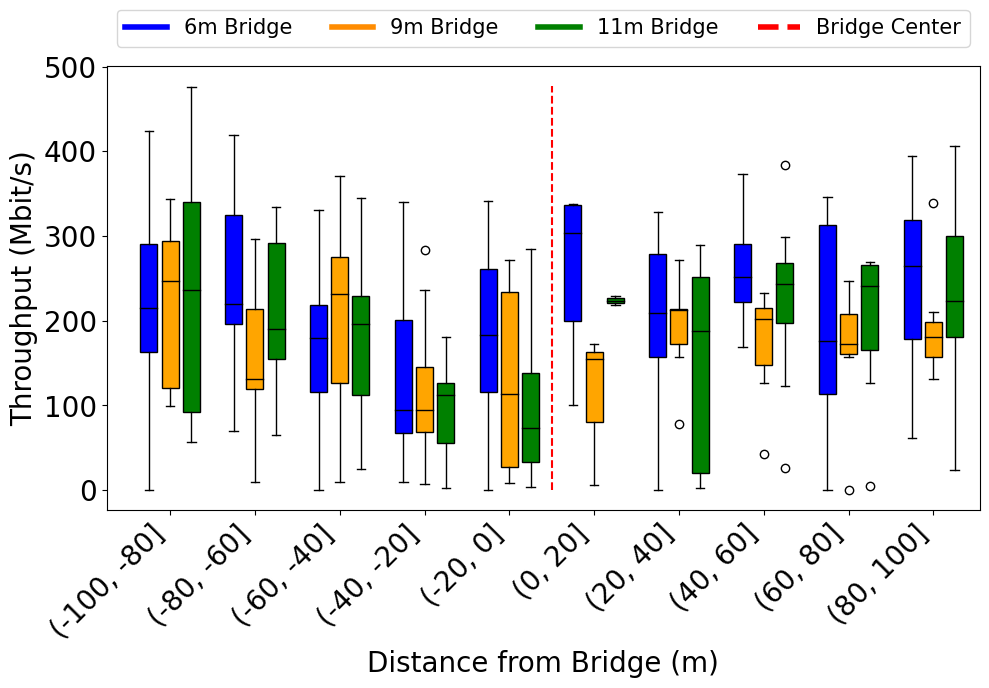

In [5]:
"""Fig. 13b"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Assuming filtered_throughput_data_6m, filtered_throughput_data_9m, and filtered_throughput_data_11m are defined
# Create bins for better box plot representation
bin_edges = np.arange(-100, 101, 20)  # Adjust bin size for clearer labels

# Assigning bins to all datasets
filtered_throughput_data_6m['Distance Bin'] = pd.cut(filtered_throughput_data_6m['Adjusted Distance to Bridge'], 
                                                      bins=bin_edges, 
                                                      include_lowest=True)

filtered_throughput_data_9m['Distance Bin'] = pd.cut(filtered_throughput_data_9m['Adjusted Distance to Bridge'], 
                                                      bins=bin_edges, 
                                                      include_lowest=True)

filtered_throughput_data_11m['Distance Bin'] = pd.cut(filtered_throughput_data_11m['Adjusted Distance to Bridge'], 
                                                       bins=bin_edges, 
                                                       include_lowest=True)

# Prepare data for box plots sorted by bin
sorted_bins = filtered_throughput_data_6m['Distance Bin'].cat.categories
data_to_plot_6m = [filtered_throughput_data_6m[filtered_throughput_data_6m['Distance Bin'] == b]['download'].values for b in sorted_bins]
data_to_plot_9m = [filtered_throughput_data_9m[filtered_throughput_data_9m['Distance Bin'] == b]['download'].values for b in sorted_bins]
data_to_plot_11m = [filtered_throughput_data_11m[filtered_throughput_data_11m['Distance Bin'] == b]['download'].values for b in sorted_bins]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Create box plots for all datasets
positions_6m = np.arange(1, len(sorted_bins) + 1)  # Positions for 6m box plots
positions_9m = positions_6m + 0.25  # Shift 9m box plots slightly to the right
positions_11m = positions_9m + 0.25  # Shift 11m box plots to the right of 9m

# Box plots for 6m, 9m, and 11m with specified colors
box_6m = ax.boxplot(data_to_plot_6m,  patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_6m, widths=0.2,
                    boxprops=dict(facecolor='blue'),medianprops=dict(color='black'))

box_9m = ax.boxplot(data_to_plot_9m,  patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_9m, widths=0.2,
                    boxprops=dict(facecolor='orange'),medianprops=dict(color='black'))

box_11m = ax.boxplot(data_to_plot_11m,  patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_11m, widths=0.2,
                     boxprops=dict(facecolor='green'),medianprops=dict(color='black'))

# Customize limits for X-axis
plt.xlim(0.5, len(sorted_bins) + 0.8)

# Set the x-ticks for the labels correctly
mid_positions = (positions_6m + positions_9m + positions_11m) / 3
ax.set_xticks(mid_positions)
x_labels = ["(-100, -80]", "(-80, -60]", "(-60, -40]", "(-40, -20]", "(-20, 0]", "(0, 20]", "(20, 40]", "(40, 60]", "(60, 80]", "(80, 100]"]
#ax.set_xticklabels([str(b) for b in sorted_bins], rotation=45, ha='right')
ax.set_xticklabels(x_labels, rotation=45, ha="right")

# Draw a single vertical line indicating the bridge center at x = 0
ax.vlines([5.75], 
           ymin=min(filtered_throughput_data_6m['download'].min(), 
                     filtered_throughput_data_9m['download'].min(), 
                     filtered_throughput_data_11m['download'].min()), 
           ymax=max(filtered_throughput_data_6m['download'].max(), 
                     filtered_throughput_data_9m['download'].max(), 
                     filtered_throughput_data_11m['download'].max()), 
           color="red", linestyle='--', label="Bridge Center")

# Customize labels and titles
fzsize = 20
ax.set_ylabel('Throughput (Mbit/s)', size=fzsize)
ax.set_xlabel('Distance from Bridge (m)', size=fzsize)

# Customize tick parameters
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)

# Add a legend for the box plots and the vertical line
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='6m Bridge'),
    Line2D([0], [0], color='darkorange', lw=4, label='9m Bridge'),
    Line2D([0], [0], color='green', lw=4, label='11m Bridge'),
    Line2D([0], [0], color='red', lw=4, linestyle='--', label='Bridge Center')
]
#ax.legend(handles=legend_elements, loc='upper left')
ax.legend(handles=legend_elements, fontsize=15, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), ncol=4, mode='expand')


# Adjust layout
plt.tight_layout()

# Save the box plot to a PDF
plt.savefig("Plots/Fig13b.pdf", format="pdf")

# Show the plot (optional)
plt.show()


/tmp/ipykernel_64372/3301867000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_throughput_data_6m['Distance Bin'] = pd.cut(filtered_throughput_data_6m['Adjusted Distance to Bridge'],
/tmp/ipykernel_64372/3301867000.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_throughput_data_9m['Distance Bin'] = pd.cut(filtered_throughput_data_9m['Adjusted Distance to Bridge'],
/tmp/ipykernel_64372/3301867000.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

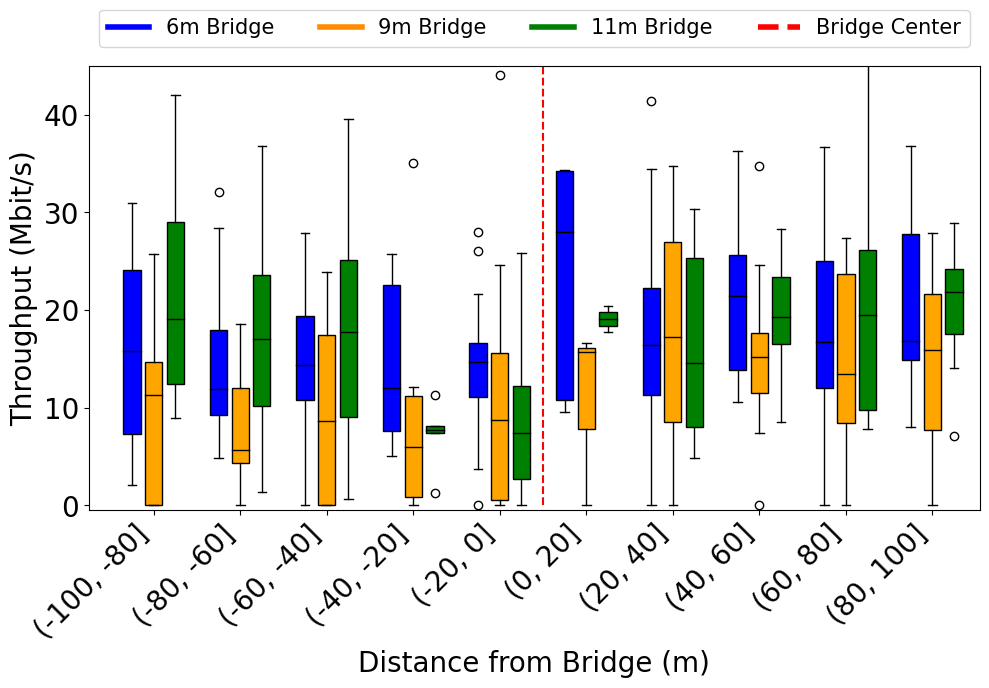

In [6]:
"""Fig. 13c"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Assuming filtered_throughput_data_6m, filtered_throughput_data_9m, and filtered_throughput_data_11m are defined
# Create bins for better box plot representation
bin_edges = np.arange(-100, 101, 20)  # Adjust bin size for clearer labels

# Assigning bins to all datasets
filtered_throughput_data_6m['Distance Bin'] = pd.cut(filtered_throughput_data_6m['Adjusted Distance to Bridge'], 
                                                      bins=bin_edges, 
                                                      include_lowest=True)

filtered_throughput_data_9m['Distance Bin'] = pd.cut(filtered_throughput_data_9m['Adjusted Distance to Bridge'], 
                                                      bins=bin_edges, 
                                                      include_lowest=True)

filtered_throughput_data_11m['Distance Bin'] = pd.cut(filtered_throughput_data_11m['Adjusted Distance to Bridge'], 
                                                       bins=bin_edges, 
                                                       include_lowest=True)

# Prepare data for box plots sorted by bin
sorted_bins = filtered_throughput_data_6m['Distance Bin'].cat.categories
data_to_plot_6m = [filtered_throughput_data_6m[filtered_throughput_data_6m['Distance Bin'] == b]['upload'].values for b in sorted_bins]
data_to_plot_9m = [filtered_throughput_data_9m[filtered_throughput_data_9m['Distance Bin'] == b]['upload'].values for b in sorted_bins]
data_to_plot_11m = [filtered_throughput_data_11m[filtered_throughput_data_11m['Distance Bin'] == b]['upload'].values for b in sorted_bins]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Create box plots for all datasets
positions_6m = np.arange(1, len(sorted_bins) + 1)  # Positions for 6m box plots
positions_9m = positions_6m + 0.25  # Shift 9m box plots slightly to the right
positions_11m = positions_9m + 0.25  # Shift 11m box plots to the right of 9m

# Box plots for 6m, 9m, and 11m with specified colors
box_6m = ax.boxplot(data_to_plot_6m,  notch=False, patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_6m, widths=0.2,
                    boxprops=dict(facecolor='blue'),medianprops=dict(color='black'))

box_9m = ax.boxplot(data_to_plot_9m,   notch=False, patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_9m, widths=0.2,
                    boxprops=dict(facecolor='orange'),medianprops=dict(color='black'))

box_11m = ax.boxplot(data_to_plot_11m,   notch=False, patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_11m, widths=0.2,
                     boxprops=dict(facecolor='green'),medianprops=dict(color='black'))

# Customize limits for X-axis
plt.xlim(0.5, len(sorted_bins) + 0.8)
plt.ylim(-0.5, 45)


# Set the x-ticks for the labels correctly
mid_positions = (positions_6m + positions_9m + positions_11m) / 3
ax.set_xticks(mid_positions)
x_labels = ["(-100, -80]", "(-80, -60]", "(-60, -40]", "(-40, -20]", "(-20, 0]", "(0, 20]", "(20, 40]", "(40, 60]", "(60, 80]", "(80, 100]"]
#ax.set_xticklabels([str(b) for b in sorted_bins], rotation=45, ha='right')
ax.set_xticklabels(x_labels, rotation=45, ha="right")

# Draw a single vertical line indicating the bridge center at x = 0
ax.vlines([5.75], 
           ymin=min(filtered_throughput_data_6m['upload'].min(), 
                     filtered_throughput_data_9m['upload'].min(), 
                     filtered_throughput_data_11m['upload'].min()), 
           ymax=max(filtered_throughput_data_6m['upload'].max(), 
                     filtered_throughput_data_9m['upload'].max(), 
                     filtered_throughput_data_11m['upload'].max()), 
           color="red", linestyle='--', label="Bridge Center")

# Customize labels and titles
fzsize = 20
ax.set_ylabel('Throughput (Mbit/s)', size=fzsize)
ax.set_xlabel('Distance from Bridge (m)', size=fzsize)

# Customize tick parameters
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)

# Add a legend for the box plots and the vertical line
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='6m Bridge'),
    Line2D([0], [0], color='darkorange', lw=4, label='9m Bridge'),
    Line2D([0], [0], color='green', lw=4, label='11m Bridge'),
    Line2D([0], [0], color='red', lw=4, linestyle='--', label='Bridge Center')
]
ax.legend(handles=legend_elements, fontsize=15, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), ncol=4, mode='expand')

# Adjust layout
plt.tight_layout()

# Save the box plot to a PDF
plt.savefig("Plots/Fig13c.pdf", format="pdf")

# Show the plot (optional)
plt.show()


In [7]:
import pandas as pd
rtt_trace = pd.read_csv('Data/Autobahn/RTT_Loss_Bridges.csv')
rtt_trace.loc[rtt_trace['nearest_bridge_line_distance'] >= 50, 'nearest_bridge_id'] = None
rtt_trace.loc[rtt_trace['lost'] == True, 'time'] = None
rtt_trace = rtt_trace[rtt_trace['time'] <= 1000]
rtt_trace
bridge_data = pd.read_csv("Data/Autobahn/Bridges.csv", sep=";")
bridge_data['Breite'] = bridge_data['Breite'].str.replace(',', '.').astype(float)
bridge_data['Laenge'] = bridge_data['Laenge'].str.replace(',', '.').astype(float)

# use all bridges where width is 6m 
bridges_6m = bridge_data[bridge_data['Breite']==6]
bridges_9m = bridge_data[bridge_data['Breite']==9]
bridges_11m = bridge_data[bridge_data['Breite']==11.75]

rtt_trace_6m = rtt_trace[rtt_trace['nearest_bridge_id'].isin(bridges_6m.index)]
rtt_trace_9m = rtt_trace[rtt_trace['nearest_bridge_id'].isin(bridges_9m.index)]
rtt_trace_11m = rtt_trace[rtt_trace['nearest_bridge_id'].isin(bridges_11m.index)]

rtt_trace_6m['Adjusted Distance to Bridge'] = rtt_trace_6m['nearest_bridge_line_distance']
for bridge_id, group in rtt_trace_6m.groupby('nearest_bridge_id'):
    min_distance_index = group['nearest_bridge_line_distance'].idxmin()
    rtt_trace_6m.loc[group.loc[:min_distance_index].index, 'Adjusted Distance to Bridge'] *= -1

rtt_trace_9m['Adjusted Distance to Bridge'] = rtt_trace_9m['nearest_bridge_line_distance']
for bridge_id, group in rtt_trace_9m.groupby('nearest_bridge_id'):
    min_distance_index = group['nearest_bridge_line_distance'].idxmin()
    rtt_trace_9m.loc[group.loc[:min_distance_index].index, 'Adjusted Distance to Bridge'] *= -1

rtt_trace_11m['Adjusted Distance to Bridge'] = rtt_trace_11m['nearest_bridge_line_distance']
for bridge_id, group in rtt_trace_11m.groupby('nearest_bridge_id'):
    min_distance_index = group['nearest_bridge_line_distance'].idxmin()
    rtt_trace_11m.loc[group.loc[:min_distance_index].index, 'Adjusted Distance to Bridge'] *= -1

/tmp/ipykernel_64372/3349535717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtt_trace_6m['Adjusted Distance to Bridge'] = rtt_trace_6m['nearest_bridge_line_distance']
/tmp/ipykernel_64372/3349535717.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtt_trace_9m['Adjusted Distance to Bridge'] = rtt_trace_9m['nearest_bridge_line_distance']
/tmp/ipykernel_64372/3349535717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/tmp/ipykernel_64372/2504884967.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtt_trace_6m['Distance Bin'] = pd.cut(rtt_trace_6m['Adjusted Distance to Bridge'],
/tmp/ipykernel_64372/2504884967.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtt_trace_9m['Distance Bin'] = pd.cut(rtt_trace_9m['Adjusted Distance to Bridge'],
/tmp/ipykernel_64372/2504884967.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

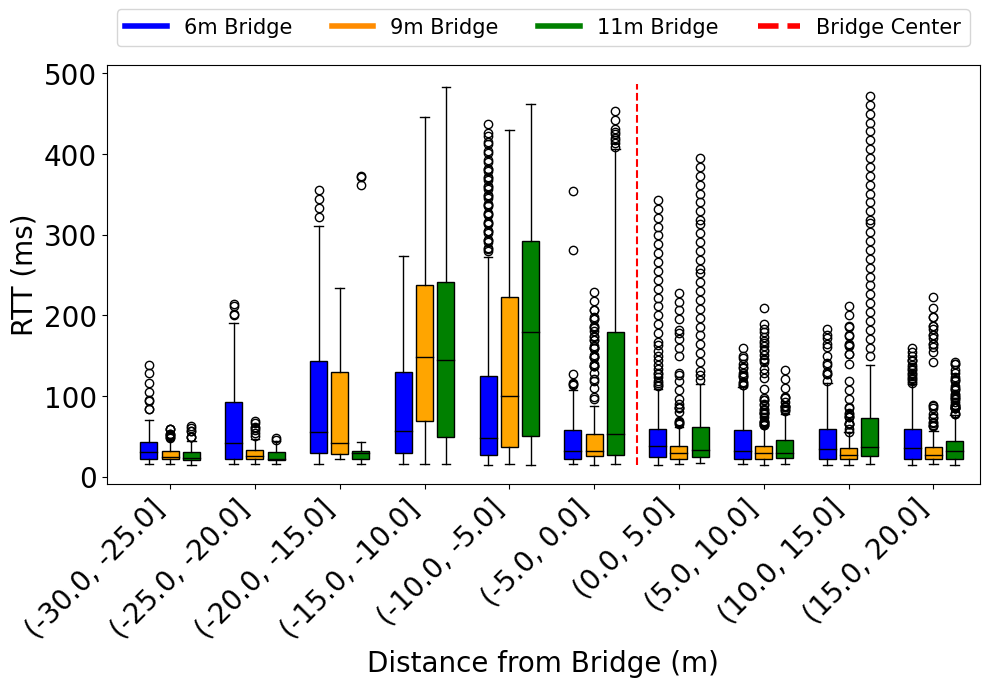

In [8]:
"""Fig. 13a"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Assuming filtered_throughput_data_6m, filtered_throughput_data_9m, and filtered_throughput_data_11m are defined
# Create bins for better box plot representation
bin_edges = np.arange(-50, 51, 5)  # Adjust bin size for clearer labels

# Assigning bins to all datasets
rtt_trace_6m['Distance Bin'] = pd.cut(rtt_trace_6m['Adjusted Distance to Bridge'], 
                                                      bins=bin_edges, 
                                                      include_lowest=True)

rtt_trace_9m['Distance Bin'] = pd.cut(rtt_trace_9m['Adjusted Distance to Bridge'], 
                                                      bins=bin_edges, 
                                                      include_lowest=True)

rtt_trace_11m['Distance Bin'] = pd.cut(rtt_trace_11m['Adjusted Distance to Bridge'], 
                                                       bins=bin_edges, 
                                                       include_lowest=True)

# Prepare data for box plots sorted by bin
sorted_bins = rtt_trace_6m['Distance Bin'].cat.categories
sorted_bins = sorted_bins[4:14]
data_to_plot_6m = [rtt_trace_6m[rtt_trace_6m['Distance Bin'] == b]['time'].values for b in sorted_bins]
data_to_plot_9m = [rtt_trace_9m[rtt_trace_9m['Distance Bin'] == b]['time'].values for b in sorted_bins]
data_to_plot_11m = [rtt_trace_11m[rtt_trace_11m['Distance Bin'] == b]['time'].values for b in sorted_bins]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Create box plots for all datasets
positions_6m = np.arange(1, len(sorted_bins) + 1)  # Positions for 6m box plots
positions_9m = positions_6m + 0.25  # Shift 9m box plots slightly to the right
positions_11m = positions_9m + 0.25  # Shift 11m box plots to the right of 9m

# Box plots for 6m, 9m, and 11m with specified colors
box_6m = ax.boxplot(data_to_plot_6m,  patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_6m, widths=0.2,
                    boxprops=dict(facecolor='blue'),medianprops=dict(color='black'))

box_9m = ax.boxplot(data_to_plot_9m,  patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_9m, widths=0.2,
                    boxprops=dict(facecolor='orange'),medianprops=dict(color='black'))

box_11m = ax.boxplot(data_to_plot_11m,  patch_artist=True, labels=[str(b) for b in sorted_bins], positions=positions_11m, widths=0.2,
                     boxprops=dict(facecolor='green'),medianprops=dict(color='black'))

# Customize limits for X-axis
plt.xlim(0.5, len(sorted_bins) + 0.8)
#plt.ylim(-0.5, 200)


# Set the x-ticks for the labels correctly
mid_positions = (positions_6m + positions_9m + positions_11m) / 3
ax.set_xticks(mid_positions)
x_labels = ["(-40, -35]", "(-35, -30]", "(-30, -25]", "(-25, -20]", "(-20, -15]", "(-15, -10]", "(-10, -5]", "(-5, 0]",
           "(0, 5]", "(5, 10]", "(10, 15]", "(15, 20]" ]
ax.set_xticklabels([str(b) for b in sorted_bins], rotation=45, ha='right')
#ax.set_xticklabels(rotation=45, ha="right")

# Draw a single vertical line indicating the bridge center at x = 0
ax.vlines([6.75], 
           ymin=min(rtt_trace_6m['time'].min(), 
                     rtt_trace_9m['time'].min(), 
                     rtt_trace_11m['time'].min()), 
           ymax=max(rtt_trace_6m['time'].max(), 
                     rtt_trace_9m['time'].max(), 
                     rtt_trace_11m['time'].max()), 
           color="red", linestyle='--', label="Bridge Center")

# Customize labels and titles
fzsize = 20
ax.set_ylabel('RTT (ms)', size=fzsize)
ax.set_xlabel('Distance from Bridge (m)', size=fzsize)

# Customize tick parameters
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)

# Add a legend for the box plots and the vertical line
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='6m Bridge'),
    Line2D([0], [0], color='darkorange', lw=4, label='9m Bridge'),
    Line2D([0], [0], color='green', lw=4, label='11m Bridge'),
    Line2D([0], [0], color='red', lw=4, linestyle='--', label='Bridge Center')
]
ax.legend(handles=legend_elements, fontsize=15, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), ncol=4, mode='expand')

# Adjust layout
plt.tight_layout()

# Save the box plot to a PDF
plt.savefig("Plots/Fig13a.pdf", format="pdf")

# Show the plot (optional)
plt.show()